In [18]:
import sys
sys.path.append("/vols/talos/home/stephan/utils/tracking")
import optical_flow_tracking as oft
import tracking_common as tco
import tracking_config as tcf

import l15_msevi.msevi as msv

import datetime as dt
import cv2

In [101]:
t0 = dt.datetime(2012,7,28,11,55)
t1 = dt.datetime(2012,7,28,12,0)

t0_str = t0.strftime("%Y%m%dt%H%M")
t1_str = t1.strftime("%Y%m%dt%H%M")

channels = ['IR_108']

sat_data = {t:[] for t in [t0_str,t1_str]}

for t in [t0,t1]:
    s = msv.MSevi(time = t, chan_list = channels)
    s.rad2bt()
    
    sat_data[t.strftime("%Y%m%dt%H%M")] = s.bt['IR_108']

Region suggests use of hdf file
Region suggests use of hdf file


In [102]:
field_t0 = sat_data[t0_str]
field_t1 = sat_data[t1_str]

In [103]:
# pack fields for some tests
fields = [field_t0, field_t1]

In [104]:
fields

[array([[275.85738169, 276.31600403, 276.31600403, ..., 283.93896393,
         284.9220011 , 283.79775293],
        [276.31600403, 276.16337667, 275.85738169, ..., 280.49394813,
         282.80372472, 282.66091786],
        [275.70401178, 276.01050294, 276.16337667, ..., 277.97896435,
         277.97896435, 275.85738169],
        ...,
        [315.23088414, 315.44634773, 315.44634773, ..., 296.30816948,
         296.30816948, 296.18233882],
        [315.66146419, 315.44634773, 315.66146419, ..., 295.9302575 ,
         296.05636831, 295.9302575 ],
        [315.76889279, 315.87623526, 315.9834918 , ..., 295.67761307,
         295.42440175, 295.67761307]]),
 array([[275.85738169, 276.16337667, 276.31600403, ..., 283.93896393,
         284.78214461, 285.06166717],
        [276.31600403, 276.16337667, 276.01050294, ..., 279.31850772,
         281.07644279, 283.0887322 ],
        [276.01050294, 275.70401178, 275.85738169, ..., 277.22665763,
         277.97896435, 278.27824692],
        ...,


In [12]:
import numpy as np

In [105]:
print np.min(fields[0]),np.max(fields[0])

213.76319846433026 322.4739900939921


In [106]:
tco.scale_array_min_max(fields[0]).astype(np.float32)

array([[0.5711869 , 0.57540566, 0.57540566, ..., 0.6455271 , 0.6545698 ,
        0.64422816],
       [0.57540566, 0.57400167, 0.5711869 , ..., 0.6138374 , 0.6350844 ,
        0.63377076],
       [0.5697761 , 0.5725955 , 0.57400167, ..., 0.5907028 , 0.5907028 ,
        0.5711869 ],
       ...,
       [0.9333727 , 0.9353547 , 0.9353547 , ..., 0.759308  , 0.759308  ,
        0.7581505 ],
       [0.93733346, 0.9353547 , 0.93733346, ..., 0.75583166, 0.75699174,
        0.75583166],
       [0.9383217 , 0.9393091 , 0.94029576, ..., 0.7535077 , 0.75117844,
        0.7535077 ]], dtype=float32)

In [107]:
array_data = fields[0]
array_min = np.min(array_data)
array_max = np.max(array_data)

print "Ausgangsbereich = [{},{}]".format(array_min,array_max)
print "Zielbereich = [0,1]"

# derive conversion parameters
a = (1 - 0) / (array_max - array_min)
b = 1 - a * array_max

print "Umwandlungsparameter: a = {}, b = {}".format(a,b)

# scale array
scaled_array = a * array_data + b

print "Skalierte Matrix\n, {}".format(scaled_array)

Ausgangsbereich = [213.763198464,322.473990094]
Zielbereich = [0,1]
Umwandlungsparameter: a = 0.00919871877492, b = -1.9663475471
Skalierte Matrix
, [[0.57118693 0.57540567 0.57540567 ... 0.64552713 0.65456981 0.64422817]
 [0.57540567 0.57400169 0.57118693 ... 0.6138374  0.63508439 0.63377074]
 [0.56977612 0.57259545 0.57400169 ... 0.59070277 0.59070277 0.57118693]
 ...
 [0.93337271 0.93535469 0.93535469 ... 0.75930797 0.75930797 0.75815049]
 [0.93733349 0.93535469 0.93733349 ... 0.75583167 0.75699173 0.75583167]
 [0.9383217  0.93930911 0.94029573 ... 0.75350766 0.75117844 0.75350766]]


In [108]:
for i,field in enumerate(fields):
    
    # the algorithm expects the inputs to have a data dype of float32
    field = field.astype(np.float32)
    
    # the flow routine expects the inputs to be in the range [0,1]
    if np.min(field) != 0 and np.max(field) != 1:
        field = tco.scale_array_min_max(field,0,1).astype(np.float32)

    fields[i] = field

In [109]:
fields

[array([[0.5711869 , 0.5754057 , 0.5754057 , ..., 0.645527  , 0.65456975,
         0.6442281 ],
        [0.5754057 , 0.57400167, 0.5711869 , ..., 0.61383736, 0.6350843 ,
         0.6337706 ],
        [0.56977594, 0.57259524, 0.57400167, ..., 0.5907029 , 0.5907029 ,
         0.5711869 ],
        ...,
        [0.9333726 , 0.9353546 , 0.9353546 , ..., 0.75930774, 0.75930774,
         0.75815046],
        [0.93733346, 0.9353546 , 0.93733346, ..., 0.7558316 , 0.7569915 ,
         0.7558316 ],
        [0.9383215 , 0.93930876, 0.9402956 , ..., 0.7535075 , 0.7511784 ,
         0.7535075 ]], dtype=float32),
 array([[0.57622504, 0.5790129 , 0.5804033 , ..., 0.64985347, 0.6575353 ,
         0.6600821 ],
        [0.5804033 , 0.5790129 , 0.57762   , ..., 0.60775805, 0.62377405,
         0.64210725],
        [0.57762   , 0.5748277 , 0.57622504, ..., 0.58870006, 0.5955541 ,
         0.59828067],
        ...,
        [0.93690586, 0.93886566, 0.937886  , ..., 0.7671175 , 0.76369   ,
         0.76369   

In [110]:
# load flow parameter set
flow_parameters = tcf.tvl1_parameters

# set flow parameters
initial_flow=None
optflow=cv2.createOptFlow_DualTVL1()

optflow.setEpsilon(flow_parameters['epsilon'])
optflow.setLambda(flow_parameters['lambda'])
optflow.setOuterIterations(flow_parameters['outer_iterations'])
optflow.setInnerIterations(flow_parameters['inner_iterations'])
optflow.setGamma(flow_parameters['gamma'])
optflow.setScalesNumber(flow_parameters['scales_number'])
optflow.setTau(flow_parameters['tau'])
optflow.setTheta(flow_parameters['theta'])
optflow.setWarpingsNumber(flow_parameters['warpings_number'])
optflow.setScaleStep(flow_parameters['scale_step'])
optflow.setMedianFiltering(flow_parameters['median_filtering'])
optflow.setUseInitialFlow(flow_parameters['use_initial_flow'])

if initial_flow is not None:
    optflow.setUseInitialFlow(True)

In [111]:
flow = optflow.calc(fields[0], fields[1],initial_flow)

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

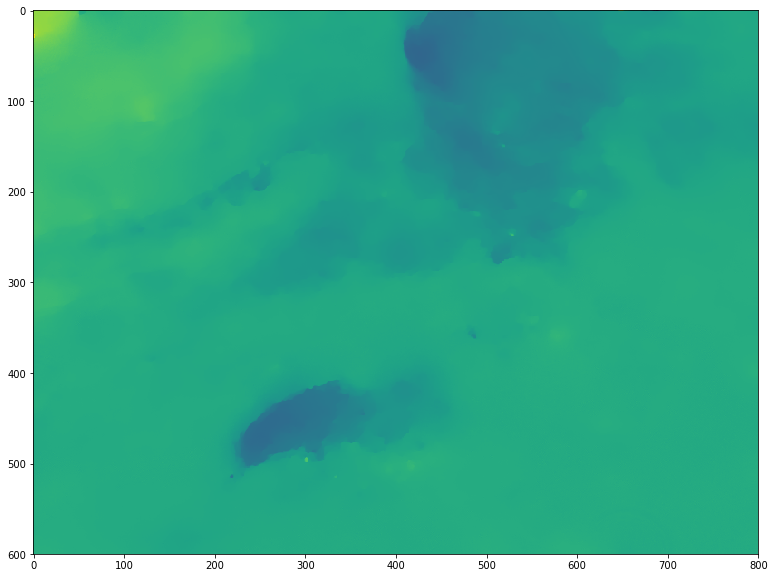

In [114]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.imshow(flow[...,1])